In [1]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data(x_file, y_file):
    X = np.loadtxt(x_file, delimiter=',')
    Y = np.loadtxt(y_file, delimiter=",")
    return X, Y

In [3]:
def one_hot_label(Y):
    size = 10
    #size = int(np.max(Y) + 1)
    return np.eye(size)[Y.astype(int)]

In [4]:
def soft_max(Y):
    C = np.max(Y, axis = 1, keepdims=True)
    temp = np.exp(Y - C)
    return temp/np.sum(temp, axis = 1, keepdims=True)

In [5]:
def sigmoid(X):
    return 1. / (1 + np.exp(- X))

$$X = \begin{bmatrix} ----(x_1) ---- \,1 \\ \vdots \\ ----(x_m) ---- \,1 \end{bmatrix}$$
And 
$$\theta = \begin{bmatrix} \theta_1 \\ \vdots \\ \theta_n \\ 1\end{bmatrix}$$

In [6]:
def init_params(*shape):
    output = []
    for i in range(1, len(shape[0])):
        output.append(np.random.normal(size = (shape[0][i - 1] + 1, shape[0][i])))
        output[-1][-1, :] = 0
    return output

In [7]:
def forward_prop(thetas, activation, X):
    output = [X]
    for i in range(len(thetas)):
        bias = np.ones((output[-1].shape[0], 1))
        output[-1] = np.c_[output[-1], bias]
        temp = output[-1] @ thetas[i]
        output.append(activation[i](temp))
    return output

In [8]:
def loss(y_hat, y):
    return np.mean(np.sum(- np.log(y_hat + 1e-16) * y, axis=1))

In [9]:
def predict(y): # output a integer vector, not one-hot
    return np.argmax(y, axis = 1)

In [10]:
def accuracy(y_hat, y):
    return y[y_hat==y].size / y.size

Update W:
$$[\frac{\partial \ell}{\partial O} \frac{\partial O}{\partial a}] \frac{\partial a}{\partial w}$$
Pass to next layer:
$$[[\frac{\partial \ell}{\partial O} \frac{\partial O}{\partial a}] \frac{\partial a}{\partial h} \frac{\partial h}{\partial a}] \frac{\partial a}{\partial w}$$

In [18]:
def back_prop(thetas, values, y, alpha):
    #delta_1 = - y * (1 - values[-1])
    delta_1 = values[-1] - y
    
    delta_2 = thetas[-1][np.newaxis, :, :] @ delta_1[:, :, np.newaxis]

    delta_2 = delta_2.reshape((delta_2.shape[0], -1))

    thetas[-1] -= alpha * np.mean(values[-2][:, :, np.newaxis] @ delta_1[:, np.newaxis, :], axis = 0)

    delta_2 = (delta_2 * (1 - values[-2]) *values[-2])[:, :-1]
    thetas[-2] -= alpha * np.mean(values[-3][:, :, np.newaxis] @ delta_2[:, np.newaxis, :], axis = 0)

    return thetas

In [13]:
raw_trainX, raw_trainY = read_data('dataset/images_train.csv', 'dataset/labels_train.csv')

In [14]:
raw_testX, raw_testY = read_data('dataset/images_test.csv', 'dataset/labels_test.csv')

-----

In [25]:
np.random.seed(1000)
p = np.random.permutation(60000)

shapes = [raw_trainX.shape[1], 300, 10]
thetas = init_params(shapes)
activations = [sigmoid, soft_max]
batchsize = 1000
numepoch = 30

###
#raw_trainX_1 = raw_trainX[p,:]
#raw_trainY_1 = raw_trainY[p]

train_X = raw_trainX[10000:, :]
train_Y = raw_trainY[10000:]
dev_X = raw_trainX[:10000, :]
dev_Y = raw_trainY[:10000]

mean = np.mean(train_X)
std = np.std(train_X)

train_X = (train_X - mean) / std
dev_X = (dev_X - mean) / std

dev_loss = []
dev_acc = []
tr_loss = []
tr_acc = []

In [26]:
lr = 5
for i in range(numepoch):
    print('epoch', i)
    for j in range(train_X.shape[0] // batchsize):
        y = one_hot_label(train_Y[j * batchsize: (j + 1) * batchsize])
        output = forward_prop(thetas, activations, train_X[j * batchsize: (j + 1) *batchsize, :])
        thetas = back_prop(thetas, output, y, lr)
        print(loss(output[-1], y), accuracy(predict(output[-1]), train_Y[j * batchsize: (j + 1) * batchsize]))
    y = one_hot_label(dev_Y)
    output = forward_prop(thetas, activations, dev_X)
    dev_loss.append(loss(output[-1], y))
    dev_acc.append(accuracy(predict(output[-1]), dev_Y))
    print(dev_loss[-1], dev_acc[-1])
    
    y = one_hot_label(train_Y)
    output = forward_prop(thetas, activations, train_X)
    tr_loss.append(loss(output[-1], y))
    tr_acc.append(accuracy(predict(output[-1]), train_Y))
    print(tr_loss[-1], tr_acc[-1])

epoch 0
13.08277867933394 0.101
24.39244076806317 0.14
18.566838585862513 0.317
19.51944043859671 0.323
22.39065653935895 0.252
17.181043597658544 0.325
16.93375777415261 0.421
11.416207371575107 0.387
5.036143082290397 0.546
2.862781349860635 0.662
2.224780831861622 0.715
1.4499421985194487 0.775
1.8579955528374712 0.744
1.365451633072348 0.787
1.4485670394998116 0.773
1.0580605878492015 0.814
1.4907764490934627 0.802
1.3691012755554985 0.812
1.3149037504610668 0.806
1.4275421179733057 0.78
1.5012956129774453 0.789
1.5094420552606738 0.805
1.3887210001188142 0.774
0.9336330632876959 0.84
1.0670294907469962 0.814
1.010073698838126 0.832
1.1768815380397646 0.814
1.1908138372534725 0.8
1.0047436814775947 0.83
1.2134980768225423 0.801
0.7642672472721033 0.864
1.0475794928236235 0.831
1.1400558004844539 0.819
0.740476609080764 0.867
0.8727528476194459 0.847
1.0208949754047791 0.835
0.9370942459486798 0.838
0.9931056474223849 0.831
0.7162284893396431 0.857
1.1147747630226859 0.815
1.0373521

0.21323337565116202 0.956
0.14290204769489356 0.967
0.20963403962326077 0.953
0.1321546052058631 0.968
0.19335534941253577 0.956
0.14867147106321912 0.964
0.23994123000165882 0.951
0.18103147526776497 0.956
0.14993949209704852 0.961
0.17196716009196927 0.958
0.16567726838646268 0.947
0.21548055488057272 0.952
0.2058628453442089 0.957
0.1124581449769018 0.969
0.16305951960698814 0.959
0.15763972085898023 0.962
0.17373510278880977 0.956
0.23882160730828206 0.949
0.12677243211654074 0.963
0.19705368370473736 0.95
0.1586465890259333 0.964
0.18207141886325964 0.952
0.17499857760784454 0.956
0.12595105510699686 0.972
0.1223040993913199 0.97
0.20006563637303804 0.954
0.18588408078594734 0.954
0.1761844341320339 0.954
0.15833848425833089 0.96
0.21376864848504926 0.943
0.19569897601757838 0.95
0.1525974444291639 0.961
0.19837051338450748 0.937
0.1452654462668715 0.958
0.1241175511542486 0.961
0.12897969521739394 0.964
0.1317072274188264 0.964
0.14414312899081294 0.963
0.0858424362454393 0.977
0

0.07861869063939234 0.984
0.13252598015824799 0.973
0.09593278363826671 0.979
0.08469601051528716 0.986
0.08763713355085301 0.978
0.08384439727594029 0.974
0.11999955750081341 0.979
0.11392342432653534 0.977
0.05445587540303424 0.982
0.08545304661678306 0.982
0.0961550088568623 0.981
0.10071175624224019 0.978
0.1306907209630474 0.97
0.0660166798995866 0.985
0.10038918501454538 0.97
0.0958115910058054 0.977
0.09551057829999408 0.972
0.08900355263177571 0.977
0.0764119573249863 0.981
0.06280813322451603 0.985
0.12019179378423778 0.976
0.1092599187337295 0.979
0.09870339167527768 0.98
0.07619786044749816 0.983
0.11148904071093446 0.972
0.11148365995544063 0.968
0.0804585506297354 0.978
0.11389697186297608 0.964
0.08469747366664504 0.977
0.07022826116580737 0.984
0.07167592332509526 0.984
0.07511566295904623 0.978
0.08771501148371587 0.98
0.04834913984774229 0.986
0.11149093827277043 0.978
0.355542780767104 0.9179
0.08344456998613925 0.97986
epoch 13
0.07854819528369586 0.98
0.090760257581

0.06255139686855854 0.988
0.05337477702298215 0.99
0.05273204463758786 0.984
0.07781813479178055 0.987
0.0761804046482078 0.986
0.03616285250604361 0.99
0.05271531383538678 0.987
0.07131949368282396 0.992
0.07113376854491059 0.984
0.08852222101000355 0.981
0.04265337817144281 0.991
0.06601357745869443 0.985
0.06460925949903298 0.984
0.06227271774857937 0.981
0.06007494809162342 0.986
0.05288734901128891 0.991
0.038907963410039256 0.993
0.0808548839218313 0.983
0.07574131438740342 0.988
0.06775653352630036 0.986
0.050475141200071474 0.989
0.0723196983951354 0.987
0.0772472202181778 0.976
0.0542779391089217 0.985
0.07640749605120731 0.972
0.06182560994454353 0.984
0.04698599488212023 0.99
0.0511944745158031 0.991
0.04675309263634296 0.985
0.059709040380209896 0.988
0.0323667610785584 0.993
0.08023520884104127 0.984
0.3400552386987732 0.9212
0.05639214622848697 0.98844
epoch 19
0.051593591108643075 0.993
0.06182731877105021 0.988
0.061843878500107426 0.985
0.0644074798451161 0.988
0.06099

0.03769528721362042 0.995
0.035559656712418626 0.994
0.055092938827563956 0.992
0.052241901595245964 0.991
0.02676035012888305 0.994
0.03477117169780327 0.993
0.05590551880070585 0.995
0.04887963557990119 0.987
0.06295842036970924 0.985
0.028946944584089942 0.995
0.04956985932923351 0.992
0.045592041443055925 0.991
0.047387779432669815 0.988
0.044859999588470124 0.991
0.039142534265757395 0.994
0.028323639986609053 0.995
0.057018760260365654 0.989
0.05815822189459807 0.993
0.049819222094537804 0.99
0.03515698327289532 0.993
0.05025720208542836 0.992
0.05679382701223217 0.986
0.039891102238415535 0.992
0.05427266400288087 0.987
0.04813655490295068 0.99
0.032278430781390914 0.994
0.0384924174603859 0.993
0.031819616874728764 0.993
0.044763801217913055 0.993
0.022237474579214867 0.997
0.06167447440502129 0.99
0.333870116952236 0.9229
0.04106178022921362 0.99232
epoch 25
0.038439802785217206 0.997
0.03996144479827409 0.993
0.043035138592875756 0.993
0.047070686519015956 0.994
0.04189405645

In [318]:
lr = 5
for i in range(numepoch):
    print('epoch', i)
    for j in range(train_X.shape[0] // batchsize):
        y = one_hot_label(train_Y[j * batchsize: (j + 1) *batchsize])
        output = forward_prop(thetas, activations, train_X[j * batchsize: (j + 1) *batchsize, :])
        thetas = back_prop(thetas, output, y, lr)
    y = one_hot_label(dev_Y)
    output = forward_prop(thetas, activations, dev_X)
    dev_loss.append(loss(output[-1], y))
    dev_acc.append(accuracy(predict(output[-1]), dev_Y))
    print(dev_loss[-1], dev_acc[-1])
    
    y = one_hot_label(train_Y)
    output = forward_prop(thetas, activations, train_X)
    tr_loss.append(loss(output[-1], y))
    tr_acc.append(accuracy(predict(output[-1]), train_Y))
    print(tr_loss[-1], tr_acc[-1])

epoch 0
0.3510435890999704 0.9148
0.17246221353816832 0.9531
epoch 1
0.3398188037200834 0.916
0.15548522383043384 0.95816
epoch 2
0.3315647883012154 0.9183
0.1415809470644385 0.96216
epoch 3
0.32493562181066565 0.9198
0.13024237266467947 0.96522
epoch 4
0.31942879462234886 0.9217
0.12083321245574363 0.96778
epoch 5
0.3147943177806191 0.923
0.11290336920366675 0.97032
epoch 6
0.3111513570469237 0.9242
0.10604138830199468 0.97264
epoch 7
0.30805955789869205 0.9241
0.10010090709740742 0.97444
epoch 8
0.3054835457404417 0.9257
0.0947368963958248 0.9765
epoch 9
0.30335859587448644 0.9259
0.08999770593210163 0.9778
epoch 10
0.3013833559703853 0.9261
0.08572798136696985 0.97908
epoch 11
0.299676316169653 0.9264
0.08187966799720586 0.98038
epoch 12
0.2982009102178156 0.927
0.07840976114700557 0.98166
epoch 13
0.296957242887582 0.9276
0.0752138370686101 0.9826
epoch 14
0.29585685472666434 0.9285
0.0722544296782558 0.98326
epoch 15
0.29489850267751083 0.9287
0.06950640235990493 0.98408
epoch 16


KeyboardInterrupt: 

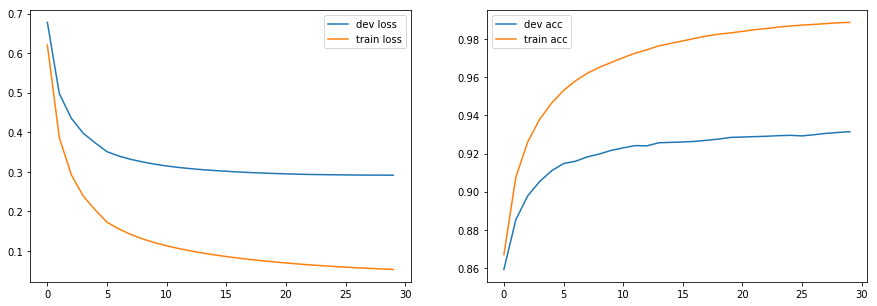

In [323]:
f, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(dev_loss, label = 'dev loss')
axs[0].plot(tr_loss, label = 'train loss')
axs[0].legend()

axs[1].plot(dev_acc, label = 'dev acc')
axs[1].plot(tr_acc, label = 'train acc')
axs[1].legend()

---

In [326]:
def back_prop_reg(thetas, values, y, alpha, lamb):
    #delta_1 = - y * (1 - values[-1])
    delta_1 = values[-1] - y
    
    delta_2 = thetas[-1][np.newaxis, :, :] @ delta_1[:, :, np.newaxis]

    delta_2 = delta_2.reshape((delta_2.shape[0], -1))

    thetas[-1] -= alpha * (np.mean(values[-2][:, :, np.newaxis] @ delta_1[:, np.newaxis, :], axis = 0) + thetas[-1] * lamb)

    delta_2 = (delta_2 * (1 - values[-2]) *values[-2])[:, :-1]
    thetas[-2] -= alpha * (np.mean(values[-3][:, :, np.newaxis] @ delta_2[:, np.newaxis, :], axis = 0) + thetas[-2] * lamb)

    return thetas

In [329]:
thetas2 = init_params(shapes)
dev_loss2 = []
dev_acc2 = []
tr_loss2 = []
tr_acc2 = []

for i in range(numepoch):
    print('epoch', i)
    for j in range(train_X.shape[0] // batchsize):
        y = one_hot_label(train_Y[j * batchsize: (j + 1) *batchsize])
        output = forward_prop(thetas2, activations, train_X[j * batchsize: (j + 1) *batchsize, :])
        thetas2 = back_prop_reg(thetas2, output, y, lr, 0.0001)
    y = one_hot_label(dev_Y)
    output = forward_prop(thetas2, activations, dev_X)
    dev_loss2.append(loss(output[-1], y))
    dev_acc2.append(accuracy(predict(output[-1]), dev_Y))
    print(dev_loss2[-1], dev_acc2[-1])
    
    y = one_hot_label(train_Y)
    output = forward_prop(thetas2, activations, train_X)
    tr_loss2.append(loss(output[-1], y))
    tr_acc2.append(accuracy(predict(output[-1]), train_Y))
    print(tr_loss2[-1], tr_acc2[-1])

epoch 0
0.6908106839955693 0.8596
0.6071986816082809 0.86998
epoch 1
0.5036394823760671 0.8854
0.37573752712986874 0.90946
epoch 2
0.4287004371848205 0.8968
0.27890701673519774 0.92898
epoch 3
0.382934760060165 0.9051
0.22437115175329317 0.941
epoch 4
0.3514982917445691 0.9102
0.18866306706885935 0.94918
epoch 5
0.3275464064555366 0.9139
0.1628792505720879 0.95656
epoch 6
0.3088205513386844 0.9166
0.14351216175968334 0.96212
epoch 7
0.2931402003944959 0.9195
0.12871355902864834 0.96612
epoch 8
0.2799694525452137 0.9224
0.11701501880205308 0.96976
epoch 9
0.2688590675864354 0.9245
0.1074424821243221 0.97268
epoch 10
0.2593671199953675 0.9272
0.09945979025446615 0.97516
epoch 11
0.2511247826704462 0.9287
0.09262061201373605 0.97702
epoch 12
0.24378539067563043 0.9313
0.0865930907222326 0.97912
epoch 13
0.2371726994715644 0.9329
0.08129330661617815 0.9811
epoch 14
0.23124076613237976 0.9343
0.07657992985654229 0.98268
epoch 15
0.22586715225874673 0.9357
0.07231003097775554 0.98404
epoch 1

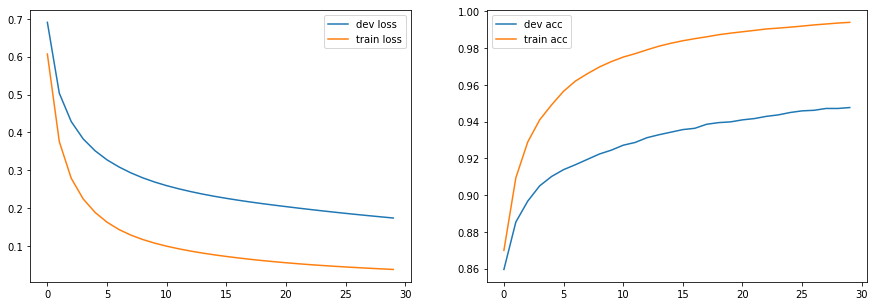

In [330]:
f, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(dev_loss2, label = 'dev loss')
axs[0].plot(tr_loss2, label = 'train loss')
axs[0].legend()

axs[1].plot(dev_acc2, label = 'dev acc')
axs[1].plot(tr_acc2, label = 'train acc')
axs[1].legend()

In [331]:
test_X = (raw_testX - mean) / std

In [341]:
y = one_hot_label(raw_testY)
output = forward_prop(thetas2, activations, test_X)
print(loss(output[-1], y), accuracy(predict(output[-1]), raw_testY))

0.1743796804017617 0.9501


In [338]:
y = one_hot_label(raw_testY)
output = forward_prop(thetas, activations, test_X)
print(loss(output[-1], y), accuracy(predict(output[-1]), raw_testY))

0.30401284431196285 0.9298


#### Visualize

7.0


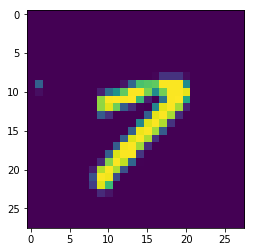

In [372]:
idx = 29
print(raw_trainY[idx])
plt.imshow(raw_trainX[idx, :].reshape(28, 28).T)

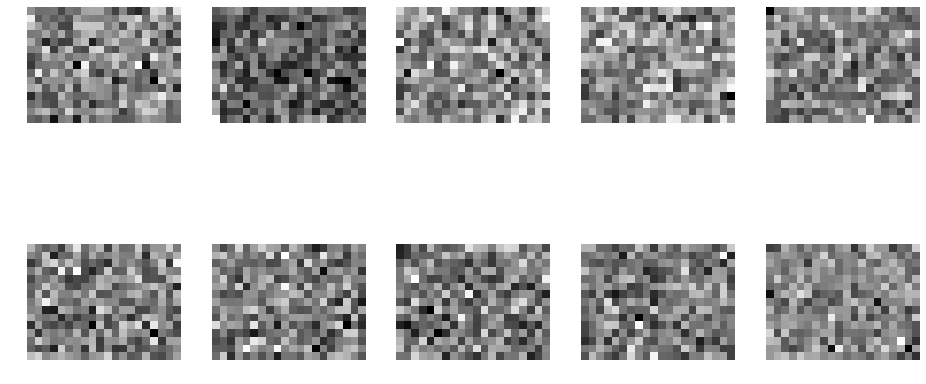

In [373]:
f, axs = plt.subplots(2, 5, figsize = (16, 8))
for m in range(2):
    for n in range(5):
        axs[m][n].axis('off')
        axs[m][n].imshow(images[:, 5 * m + n].reshape(20, 15).T, cmap = 'gray')
        